In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the CSV file into a DataFrame (replace 'iris.csv' with the name of your file)
iris_df = pd.read_csv('IRIS.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(iris_df.head())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(iris_df.describe())

# Display unique species in the dataset
print("\nUnique species in the dataset:")
print(iris_df['species'].unique())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Summary statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.9

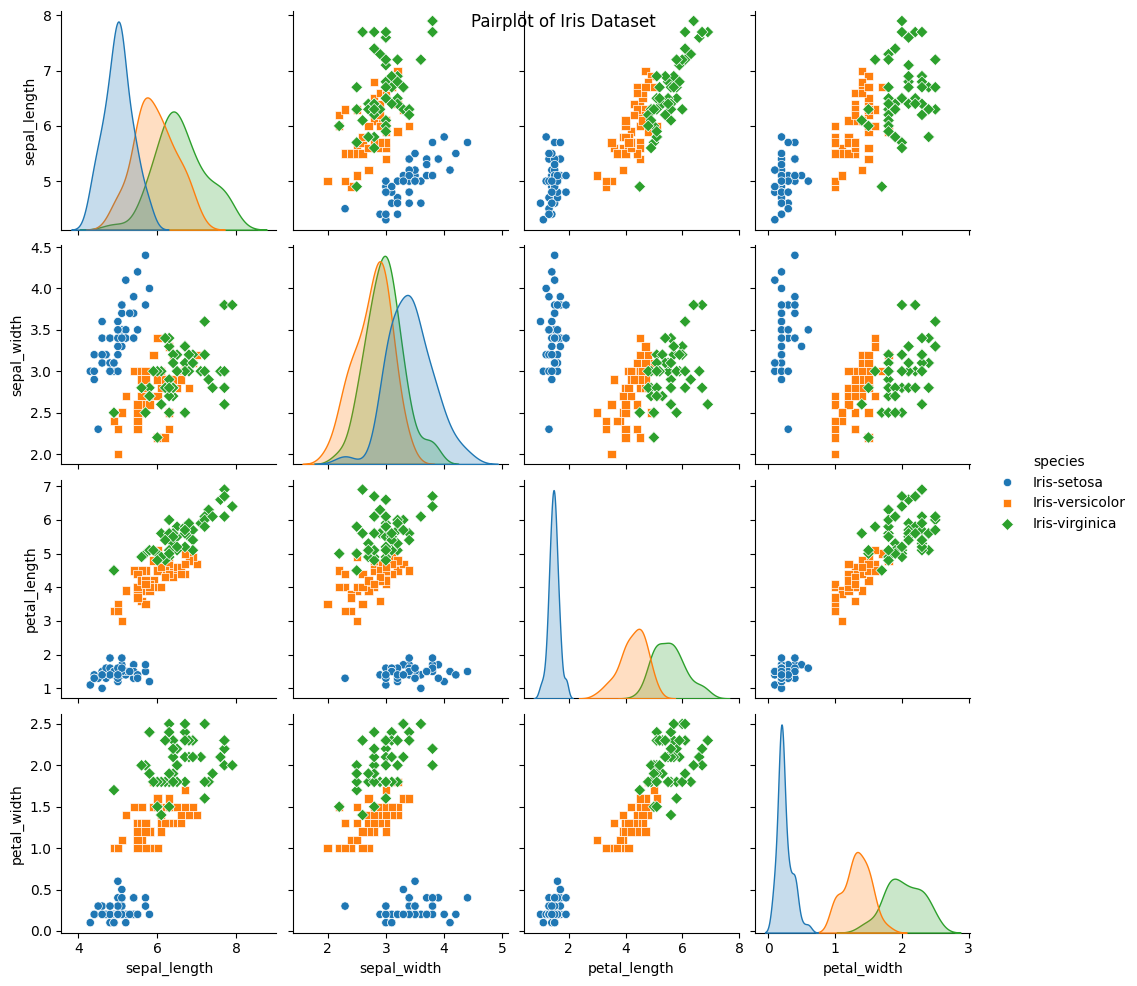

In [3]:
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset')
plt.show()


In [4]:
# Prepare the features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Define the K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [7]:
# Make predictions on the test set
y_pred = knn.predict(X_test)


In [9]:
# Assuming you have already run predictions and have y_test and y_pred
# Extract unique species names from the dataset
target_names = iris_df['species'].unique()

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Print accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Accuracy Score:
1.0


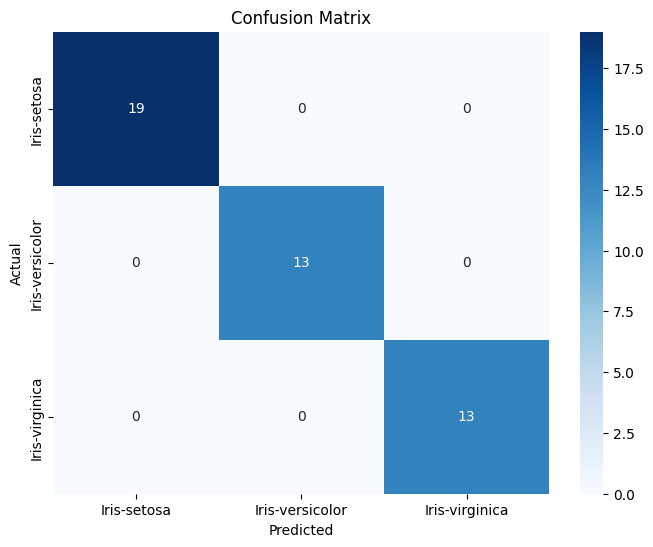

In [11]:
# Extract unique species names from the dataset
target_names = iris_df['species'].unique()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
# Test with new data
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Replace with actual measurements
new_data_scaled = scaler.transform(new_data)

# Make predictions with the trained KNN model
prediction = knn.predict(new_data_scaled)

# Directly print the predicted class label
print("Prediction for new data:", prediction[0])




Prediction for new data: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
